In [14]:
#1.b) 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


file_path = r"https://raw.githubusercontent.com/Sumanth457/is7332025/refs/heads/main/data-mining-project-repo/03032025_CW/hamspam.csv"
df = pd.read_csv(file_path)


df['Contains Link'] = df['Contains Link'].map({'Yes': 1, 'No': 0})
df['Contains Money Words'] = df['Contains Money Words'].map({'Yes': 1, 'No': 0})
df['Length'] = df['Length'].map({'Long': 1, 'Short': 0})
df['Class'] = df['Class'].map({'Spam': 1, 'Ham': 0})

X = df[['Contains Link', 'Contains Money Words', 'Length']]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

# KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

Naive Bayes Accuracy: 0.535
KNN Accuracy: 0.535


In [16]:
#2a)
import pandas as pd



file_path = "https://raw.githubusercontent.com/Sumanth457/is7332025/refs/heads/main/data-mining-project-repo/03032025_CW/roc_data.csv" 
df = pd.read_csv(file_path)  


thresholds = [0.95, 0.90, 0.85, 0.80, 0.75, 0.70]


total_pos = sum(df["True_Label"] == 1)
total_neg = sum(df["True_Label"] == 0)


results = []


for threshold in thresholds:
    df["Predicted_Label"] = (df["Prediction"] >= threshold).astype(int)
    
    TP = sum((df["Predicted_Label"] == 1) & (df["True_Label"] == 1))
    FP = sum((df["Predicted_Label"] == 1) & (df["True_Label"] == 0))
    TN = sum((df["Predicted_Label"] == 0) & (df["True_Label"] == 0))
    FN = sum((df["Predicted_Label"] == 0) & (df["True_Label"] == 1))
    
    TPR = TP / total_pos if total_pos > 0 else 0
    FPR = FP / total_neg if total_neg > 0 else 0

    total_count = TP + FP + TN + FN
    print(f"Threshold: {threshold} -> TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}, Total: {total_count}")

    results.append([threshold, TP, FP, TN, FN, TPR, FPR])

roc_table = pd.DataFrame(results, columns=["Threshold", "TP", "FP", "TN", "FN", "TPR", "FPR"])

print(roc_table)

Threshold: 0.95 -> TP: 39, FP: 4, TN: 74, FN: 33, Total: 150
Threshold: 0.9 -> TP: 46, FP: 5, TN: 73, FN: 26, Total: 150
Threshold: 0.85 -> TP: 51, FP: 5, TN: 73, FN: 21, Total: 150
Threshold: 0.8 -> TP: 54, FP: 5, TN: 73, FN: 18, Total: 150
Threshold: 0.75 -> TP: 55, FP: 6, TN: 72, FN: 17, Total: 150
Threshold: 0.7 -> TP: 58, FP: 6, TN: 72, FN: 14, Total: 150
   Threshold  TP  FP  TN  FN       TPR       FPR
0       0.95  39   4  74  33  0.541667  0.051282
1       0.90  46   5  73  26  0.638889  0.064103
2       0.85  51   5  73  21  0.708333  0.064103
3       0.80  54   5  73  18  0.750000  0.064103
4       0.75  55   6  72  17  0.763889  0.076923
5       0.70  58   6  72  14  0.805556  0.076923


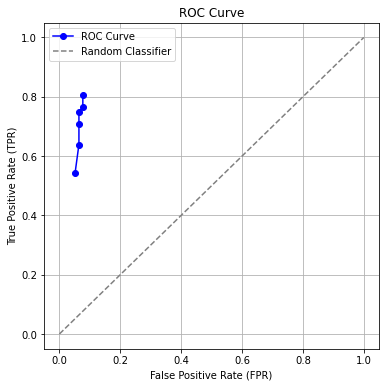

In [17]:
#2.a) Plot 
import pandas as pd
import matplotlib.pyplot as plt


file_path = "https://raw.githubusercontent.com/Sumanth457/is7332025/refs/heads/main/data-mining-project-repo/03032025_CW/roc_data.csv" 
df = pd.read_csv(file_path) 


thresholds = [0.95, 0.90, 0.85, 0.80, 0.75, 0.70]


tpr_values = []
fpr_values = []


total_pos = sum(df["True_Label"] == 1)
total_neg = sum(df["True_Label"] == 0)

for threshold in thresholds:
    df["Predicted_Label"] = (df["Prediction"] >= threshold).astype(int)
    
    TP = sum((df["Predicted_Label"] == 1) & (df["True_Label"] == 1))
    FP = sum((df["Predicted_Label"] == 1) & (df["True_Label"] == 0))
    
    TPR = TP / total_pos if total_pos > 0 else 0
    FPR = FP / total_neg if total_neg > 0 else 0
    
    tpr_values.append(TPR)
    fpr_values.append(FPR)


plt.figure(figsize=(6, 6))
plt.plot(fpr_values, tpr_values, marker='o', linestyle='-', color='b', label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.savefig("roc_curve_2a.png")  
plt.show()

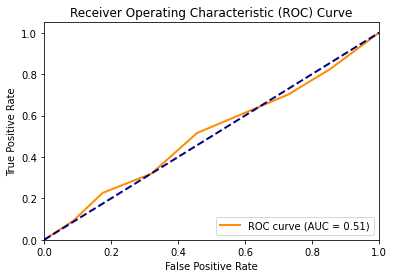

AUC Score: 0.5091


In [18]:
#2.b)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

file_path = "https://raw.githubusercontent.com/Sumanth457/is7332025/refs/heads/main/data-mining-project-repo/03032025_CW/hamspam.csv"
df = pd.read_csv(file_path, index_col='ID')

# Encode categorical variables
le = LabelEncoder()
df['Contains Link'] = le.fit_transform(df['Contains Link'])
df['Contains Money Words'] = le.fit_transform(df['Contains Money Words'])
df['Length'] = le.fit_transform(df['Length'])
df['Class'] = le.fit_transform(df['Class'])

# Split features and target
X = df[['Contains Link', 'Contains Money Words', 'Length']]
y = df['Class']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Naive Bayes model
nb_model = CategoricalNB()
nb_model.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = nb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig("roc_curve_2b.png") 
plt.show()

print(f"AUC Score: {roc_auc:.4f}")
